treat discrete actions as classification

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()

print(digits.data.shape) # image data shape
print(digits.target.shape) # label data shape

print(digits.data[0].shape)

(1797, 64)
(1797,)
(64,)


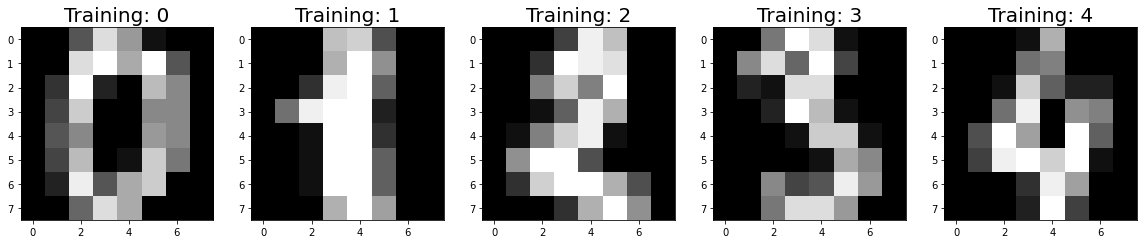

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f'Training: {label}', fontsize = 20)

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [4]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(random_state=0,max_iter=10000)

logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [5]:
logisticRegr.predict(x_test[0].reshape(1,-1))
logisticRegr.predict(x_test[0:10])
predictions = logisticRegr.predict(x_test)

In [6]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


### confusion matrix

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


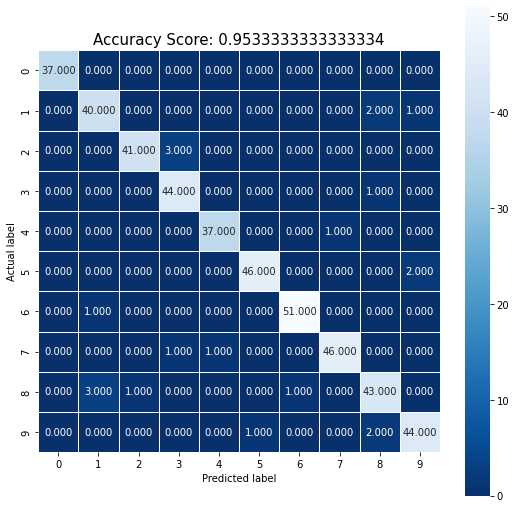

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics



cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [11]:
import os
os.system('jupyter nbconvert --to html logistic_regression.ipynb') 

0